
WEEK 3 ONLINE ACTIVITY
---
*Credit: Emma Hughson (former Affective Computing TA)*

In this week's exercise we are going to run our own statistical analysis of a dataset. We will define our hypothesis and run various statistical tests to either provide evidence for or against our hypotheses.

Each part has questions that you should answer. At the end of the exercise summarize all your findings on the discussion board for this exercise. Note any interesting questions or concerns that you may have developed throughout this exercise.

After this activity, you will be able to:
1. Develop hypotheses
2. Calculate t-test
3. Calculate ANOVA
4. Understand correlations
5. Know when and why we use such statistical tests


In [96]:
import numpy as np
import pandas as pd

import scipy.stats as ss
from scipy.stats import levene
from scipy.stats import t

from statsmodels.stats.multicomp import pairwise_tukeyhsd

import seaborn as sn
import matplotlib.pyplot as plt

---
Dataset
---

The [dataset](https://www.kaggle.com/yamqwe/depression-anxiety-stress-scales) you will use in this activity was taken from Kaggle. The data was collected using the [Ten Item Personality Inventory](https://gosling.psy.utexas.edu/wp-content/uploads/2014/09/tipi.pdf).  The Ten Item Personality Inventory has participants rate how much they agreed with a given statement to determine their Big 5 Personality traits.

The Big 5 Personality traits (or OCEAN) are:
- O: Openness
- C: Conscientiousness
- E: Extraversion
- A: Agreeableness
- N: Neuroticism

For more information, check out: [wiki.](https://en.wikipedia.org/wiki/Big_Five_personality_traits)

Before we begin, we have to download our dataset first.

If you are using Google Collab:
Please use the csv file attached to the assignment and upload it in the google collab content drive. You can do this by:
1. Clicking the file folder icon on the left side of your screen called "Files",
2. Click the icon that looks like a piece of paper with an upward arrow inside called "upload to session storage"
3. Select the csv file you downloaded from Canvas.

If you access as Jupyter Notebook:
replace "/content/data.csv" with the filepath of your "data.csv" download on your local computer.

In [97]:
df = pd.read_csv("data.csv",sep='\t', usecols = ["TIPI1", "TIPI2", "TIPI3", "TIPI4", "TIPI5", "TIPI6", "TIPI7", "TIPI8", "TIPI9", "TIPI10"])
df.head()

,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
0,1,5,7,7,7,7,7,5,1,1
1,6,5,4,7,5,4,7,7,1,5
2,2,5,2,2,5,6,5,5,3,2
3,1,1,7,4,6,4,6,1,6,1
4,2,5,3,6,5,5,5,6,3,3



Ten Item Personality Inventory
Once you have downloaded the dataset, lets look at the relevant features for this exercise.
- TIPI1 Extraverted, enthusiastic.
- TIPI2 Critical, quarrelsome.
- TIPI3 Dependable, self-disciplined.
- TIPI4 Anxious, easily upset.
- TIPI5 Open to new experiences, complex.
- TIPI6 Reserved, quiet.
- TIPI7 Sympathetic, warm.
- TIPI8 Disorganized, careless.
- TIPI9 Calm, emotionally stable.
- TIPI10 Conventional, uncreative.

The TIPI attributes were determined by gathering ratings to several statements in the format of "I see myself as:"
- __6__ Extraverted, enthusiastic.
- __8__ Critical, quarrelsome.
- __5__ Dependable, self-disciplined.
- __8__ Anxious, easily upset.
- __9__ Open to new experiences, complex.
- __9__ Reserved, quiet.
- __9__ Sympathetic, warm.
- __2__ Disorganized, careless.
- __7__ Calm, emotionally stable.
- __6__ Conventional, uncreative.

Filling in "____" with:

1 = Disagree strongly
2 = Disagree moderately
3 = Disagree a little
4 = Neither agree nor disagree
5 = Agree a little
6 = Agree moderately
7 = Agree strongly

For those curious, here is a link for how to score the test: [how to interpret scores](https://www.psychologytoday.com/us/blog/darwins-subterranean-world/201810/take-quick-personality-test).

**QUESTION 1**
---
Now that we know how the test works and we have our dataset, let's formulate an overall hypothesis. Recall that a hypothesis is a question or statement which you intend to provide evidence for or against.

Refer to the groups in the next code cell. You can play around with any combination of groups but try to be as specific as possible and use two groups for the t-tests. As we get into ANOVAs we will incorporate more groups but for now just focus on two.
> For example, I hypothesize that participants who rate high on extraversion will also rate high on anxiousness (group_1 and group_4).  

**YOUR HYPOTHESIS**: Being extraverted is associated with being open to new experiences, using this as a guideline, we can hypothesize that participants who rate high on extraversion will also rate high on openness to new experiences (group_1 and group_5).


Note: here is a [quideline](https://www.scribbr.com/apa-style/numbers-and-statistics/) for APA on how to report statistical test results. Refer to this throughout your study.


In [98]:
#I've grabbed all the columns for you so you dont have to.
group_1 = df[['TIPI1']] #Extraverted, enthusiastic
group_2 = df[['TIPI2']] #Critical, quarrelsome.
group_3 = df[['TIPI3']] #Dependable, self-disciplined.
group_4 = df[['TIPI4']] #Anxious, easily upset
group_5 = df[['TIPI5']] #Open to new experiences, complex
group_6 = df[['TIPI6']] #Reserved, quiet
group_7 = df[['TIPI7']] #Sympathetic, warm
group_8 = df[['TIPI8']] #Disorganized, careless
group_9 = df[['TIPI9']] # Calm, emotionally stable
group_10 = df[['TIPI10']] #Conventional, uncreative


---
Preliminaries
---

We are going to start of with some preliminary statistics. Calculate the mean and standard deviation of the groups you wish to investigate. Then plot their histograms to compare their distributions.


In [99]:
#Replace X and Y with the groups that you would like to investigate. See how their means compare
X = group_1
Y = group_5
mean_1 = X.mean()
mean_2 = Y.mean()
std_1 = X.std()
std_2 = Y.std()
print(f"the mean of X is {mean_1} \nthe mean of Y is {mean_2}")
print(f"the standard deviation of X is {std_1} \nthe standard deviation of Y is {std_2}")

the mean of X is TIPI1    3.786097
dtype: float64 
the mean of Y is TIPI5    4.934331
dtype: float64
the standard deviation of X is TIPI1    1.902671
dtype: float64 
the standard deviation of Y is TIPI5    1.722929
dtype: float64


array([[<Axes: title={'center': 'TIPI1'}>]], dtype=object)

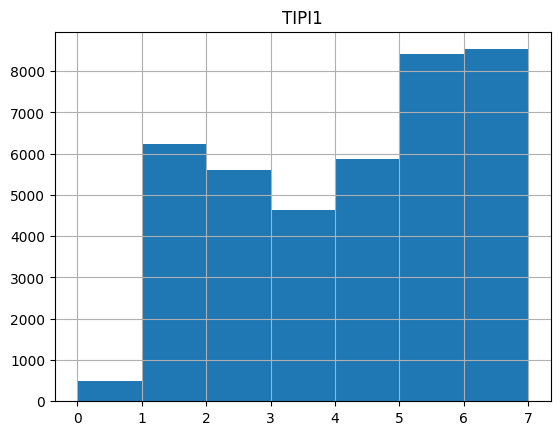

In [100]:
X.hist(bins=7) #replace X with a column from the dataset to see its distribution
#Complete the plot: What 3 compenets is this plot missing?

array([[<Axes: title={'center': 'TIPI5'}>]], dtype=object)

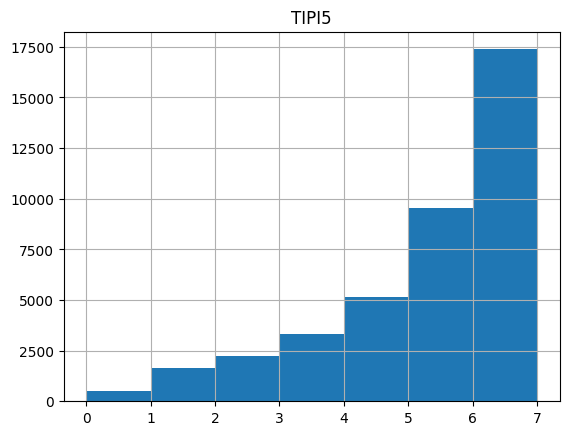

In [101]:
Y.hist(bins=7)  #replace X with a column from the dataset to see its distribution
#Complete the plot: What 3 compenets is this plot missing?

---
Equal Variance Test
---
In order to do a independent t-test we need to first meet [two assumptions](https://blog.minitab.com/en/quality-business/common-assumptions-about-data-part-2-normality-and-equal-variance): (1) normal distribution and (2) equal variance.
> There are other assumptions that must be met, but the above two are most important for our purposes. You can read more about the assumptions [here](https://www.investopedia.com/ask/answers/073115/what-assumptions-are-made-when-conducting-ttest.asp#:~:text=A%20t%2Dtest%20is%20a,on%20a%20sample%20of%20data.&text=Among%20these%20assumptions%2C%20the%20data,must%20follow%20a%20normal%20distribution.)

Normal distribution is where our data falls into a bell-shaped curve (or distribution). Although there are mathematically sound ways to test for normal distribution, for our purposes using the above histrogram plots provides enough information. The histograms above should tell us whether or not our population samples are normally distributed if they fall into a bell-shaped distribution or there are left/right skewed.
> For more information check out:
> 1. [student t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution)
> 2. [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution)
> 3. [skewness](https://www.investopedia.com/terms/s/skewness.asp)

In addition to normal distribution is equal variance. Variance is a statistical quality that informs us about the spread of our data. Equal variance checks to see if two populations have the same spread. For our purposes we wont get in-depth on how to calculate equal variance tests by hand, but checking to see if our two populations' standard deviations are similar will suffice.
> Using Levene's test we can also confirm if our two populations have equal variance.

**QUESTION** 2:
---


 Are the above attributes normally distributed?

**Your Answer:**
No, a normal distribution is a bell-shaped curve. The histograms above show that the distributions are not bell-shaped. TIP1 has the closest resemblance to a normal distribution, but it is still not a perfect bell-shaped curve. TIP5 has an ascending curve which is not a normal distribution.

> NOTE: don't worry too much if they arent normally distributed. Statistical tests are quite robust to skewed and non-normal data. This is not true, however, for small datasets. Keep that in mind!

**QUESTION** 3:
---



Another assumption of t-tests of two groups is that they have equal variance. Do the above distributions have equal variance?

**Your Answer:**
Variance is a statistical quality that informs us about the spread of our data. Equal variance checks to see if two populations have the same spread. In TIP1, the spread is quite uniform except for the first column, however the ascending curve in TIP5 shows that the spread is not uniform. Therefore, the distributions do not have equal variance.

> NOTE: don't worry too much if they don't equal variance, we have a t-test for that.



---
Levene's Test for Equal Variance
---
Let's see if our distributions actually have equal variance. [Levene's test](https://en.wikipedia.org/wiki/Levene's_test) provides a quantitative assessment of variance amongst groups.

If the returned p-value is small (<0.05) this indicates that our two populations do not have equal variance.

**QUESTION 4**:
---

Note down your p-value results. Report them in your summary on the discussion board.

In [102]:
stat, p = levene(group_1.TIPI1, group_5.TIPI5) #replace X and Y with the columns you have chosen to investigate.
p # small p-value suggests that the populations do not have equal variances.

0.0

---
Hypothesis Testing
---

Before we continue, we need to define our alternative hypothesis and null hypothesis for t-tests. This is slightly different than our original hypothesis which we hope to answer.

These hypotheses are crucial when determining t-test and ANOVA results. If we have a significant p-value, we can reject the null hypothesis and can assume that our groups selected for testing have significantly different means.

For example, if we were looking at height of males versus females and our initial hypothesis is that males are taller than females, our alternative and null hypothesis would be:
- Null: mean height between males and females are not different.
- Alternative: mean height between males and females is significantly different.

> This can be further fleshed out by indicating what direction the mean will be different in (e.g., mean height of females will be less than mean height of males).


**QUESTION** 5:
---



**Null Hypothesis**: The mean score of extraversion and openness to new experiences are not significantly different.

**Alternative Hypothesis**: The mean score of extraversion and openness to new experiences are significantly different.




---
Independent Samples T-Test
---



### Two Tailed
Two tailed t-tests test our hypothesis in two directions. For example if our hypothesis is that mean of A > or < mean of B, and we get a significant p-value then we can reject our null hypothesis that mean of A = mean of B.
> This would essentially be testing our example of female vs. male height.

For our purposes we set our significance threshold to be 0.05 for our two-tailed t-tests (and for ANOVA test - more on this later). If we get a p-value <= 0.05 we reject the null hypothesis. If we get a p-value > 0.05 we accept the null hypothesis.

Below we calculate two types of t-tests by hand.
> You will have to fill in the blanks for Welch's t-test but the student t-test is already filled in for you.

The t-test used depends on whether or not you passed levene's equal variance test. If we have equal variance then we use a ordinary student t-test, whereas if we dont have equal variance we use Welch's t-test. Compare your results with the one given by the scipy package.  

> Note: Given the current data is quite large, the degrees of freedom found will most likely also be large, so don't worry about finding a t-value in a t-distribution table. Scipy has a easy method of calculating this for you. However, for future reference (like for a midterm), refer to this table for finding p-values based on a t-table: https://www.tdistributiontable.com/.

Also refer to page 110 for useful tips on t-tests in Practical Statistics for Data Scientist.

Here are some other useful links:
- https://machinelearningmastery.com/how-to-code-the-students-t-test-from-scratch-in-python/
- https://pythonfordatascienceorg.wordpress.com/welch-t-test-python-pandas/


### Student t-test
As already mentioned, this test is used when you do have equal variance.


t statistic:
$t= \frac{\bar{x} - \bar{y}}{\sqrt{\frac{σ_x}{\sqrt{n_x}}^2+\frac{σ_y}{\sqrt{n_y}}^2}}$

$\bar{x}$ = mean of group X

$\bar{y}$ = mean of group Y

$σ_x$ = standard deviation of group X

$σ_y$ = standard deviation of group Y

$n_x$ = size of group X

$n_y$ = size of group Y

Degrees of Freedom:
$df = n_x + n_y - 2.0$


In [103]:
def t_test(data1, data2):
  mean1, mean2 = np.mean(data1), np.mean(data2)
  std1, std2 = np.std(data1), np.std(data2)
  n1, n2 = len(data1), len(data2)
  se1, se2 = std1/np.sqrt(n1), std2/np.sqrt(n2)
  sd = np.sqrt(se1**2.0 + se2**2.0)
  t_stat = (mean1 - mean2)/sd
  df = n1 + n2 - 2.0
  p_value = 2 * ss.t.sf(abs(t_stat), df)

  return t_stat, p_value

t_stat, p_value = t_test(X.to_numpy(), Y.to_numpy()) #replace X, Y with the columns you have chosen.

print(f"t: {t_stat} and and p:{p_value}")

if 0.05 < p_value:
  print("accept null hypothesis")
else:
  print("reject null hypothesis")

t: -89.2160485124213 and and p:0.0
reject null hypothesis


### Welch's t-test
As already mentioned this test is used when you don't have equal variance.

There are slight differences to the above student t-test, which I will briefly go through.

Welch's t statistic:
$t= \frac{\bar{x} - \bar{y}}{\sqrt{\frac{S_x}{n_x}+\frac{S_y}{n_y}}}$

$\bar{x}$ = mean of group X

$\bar{y}$ = mean of group Y

$S_x$ = variance of group X

$S_y$ = variance of group Y

$n_x$ = size of group X

$n_y$ = size of group Y

Degrees of Freedom:
$df = \frac{(\frac{S_x}{n_x}+\frac{S_y}{n_y})^2}{\frac{\frac{S_x}{n_x}^2}{n_x - 1}+\frac{\frac{S_y}{n_y}^2}{n_y - 1}}$



In [104]:
def t_welch(data1, data2):
  mean1, mean2 =  np.mean(data1), np.mean(data2) # calculate means
  var1, var2 = np.var(data1, ddof=1), np.var(data2, ddof=1)# calculate variance
  n1, n2 = len(data1), len(data2)
  s_welch = np.sqrt(var1/n1 + var2/n2) #blanked here calculate the denominator of t statistic
  t_stat = (mean1 - mean2) / s_welch
  f_num = (var1/n1 + var2/n2) ** 2 #blanked here calculate the numerator of degrees of freedom
  f_dem = (var1**2) / ((n1**2) * (n1-1)) + (var2**2) / ((n2**2) * (n2-1)) #blanked here calculate the denominator of degrees of freedom
  df = f_num/f_dem
  p_value = 2 * ss.t.sf(abs(t_stat), df)
  return t_stat, df, p_value

t_stat, df, p_value = t_welch(X.to_numpy(), Y.to_numpy())#replace X, Y with the columns you have chosen.

print(f"t: {t_stat} and df: {df}, and p:{p_value}")

if 0.05 < p_value:
  print("accept null hypothesis")
else:
  print("reject null hypothesis")

t: -89.21492699627706 and df: 78777.32897120969, and p:0.0
reject null hypothesis


In [105]:
#replace X, Y with the columns you have chosen. Replace Z with True if you passed Levene's test, False otherwise.
two_tailed = ss.ttest_ind(X, Y, equal_var=False)
print(two_tailed)


if 0.05 < two_tailed.pvalue:
  print("accept null hypothesis")
else:
  print("reject null hypothesis")

TtestResult(statistic=array([-89.214927]), pvalue=array([0.]), df=array([78777.32897121]))
reject null hypothesis


### One Tailed
One tailed t-tests test our hypothesis in one direction. For example, if our hypothesis is that Group A < B and we get a significant p-value then we can reject the null hypothesis that B <= A.
> This would allow us to specify a direction of difference.

Unfortunately, scipy does not do one-tailed t-tests. But we can use what we have previously found to approximate the p-value of a one-tailed t-test.

- Hint: https://stats.oarc.ucla.edu/other/mult-pkg/faq/pvalue-htm/#:~:text=The%20easiest%20way%20to%20convert,value%20provided%20in%20the%20output.

In [106]:
one_tailed = p_value/2 #Replace P with the value that will help use calculate a one-tailed t-test
one_tailed

if one_tailed < p_value:
  print("accept null hypothesis")
else:
  print("reject null hypothesis")

reject null hypothesis


**QUESTION 6**
---
Summarize your findings from both the two-tailed and one-tailed t-test using the APA guidelines noted above.
What do you think your results mean?

**Your Answer:**
The two-tailed t-test resulted in a p-value of 0.0, which is less than the significance threshold of 0.05. Therefore, we reject the null hypothesis and accept the alternative hypothesis. This means that the mean score of extraversion and openness to new experiences are significantly different. The one-tailed t-test resulted in a p-value of 0.0, which is less than the significance threshold of 0.05. Therefore, we reject the null hypothesis and accept the alternative hypothesis. This means that the mean score of extraversion is significantly higher than the mean score of openness to new experiences.



---
One Way ANOVA
---

ANOVAs are used for when you want to test the mean of more than two groups. Here, our alternative hypothesis intends to see if at least one group mean is significantly different from the others.

Here is your chance to test your alternative hypothesis with more than 2 groups. First, we need to redefine our original hypothesis. This time let's include 3 or personality trait inventories to our hypothesis.
> For example, I hypothesize that participants who rate high on extraversion will also rate high on anxiousness and low on calmness (group_1, group_4, group_9).

We will first go through each step of calculating and ANOVA and then compare our results with the ANOVA provided by statsmodel. If everything is correct you should get the same answer. You will report the results of your ANOVA test using the APA guideline above.

It is important to also note that we have been discussing direction in our general hypotheses, but ANOVA and t-tests assess if population (or group) means are different. Therefore we must also redefine our Null and Alternative hypothesis.


**QUESTION 7:**
---
**Null Hypothesis**:
Now, it is hypothesized that the mean score of extraversion, anxiousness, and calmness are not significantly different.

**Alternative Hypothesis**:
It is hypothesized that the mean score of extraversion, anxiousness, and calmness are significantly different.

Check out pages 118-123 on ANOVAs in Practical Statistics for Data Scientist.

Here is a useful link when going through how to calculate a one-way ANOVA: https://towardsdatascience.com/1-way-anova-from-scratch-dissecting-the-anova-table-with-a-worked-example-170f4f2e58ad






In [107]:
#RUN but ignore cell contents-> it sets up your dataset so it is easier to work with.
total = group_1.values.tolist() + group_2.values.tolist() + group_3.values.tolist()
total = [item for sublist in total for item in sublist]
attributes = (['group_1'] * len(group_1)) + (['group_2'] * len(group_2)) + (['group_3'] * len(group_3))

data = pd.DataFrame({'attributes': attributes, "rating": total})
data

,attributes,rating
0,group_1,1
1,group_1,6
2,group_1,2
3,group_1,1
4,group_1,2
...,...,...
119320,group_3,3
119321,group_3,5
119322,group_3,7
119323,group_3,5


**Step 1: Compute sum of squares total**

$SST=\sum_{i=1}^n (x_{i} - \bar{x})^2$

$\bar{x}$ = total mean

$x_{i}$ = individual scores

In [108]:
#step one: compute sum of squares total
data['overall_mean'] = data['rating'].mean()
SST = ((data['rating'] - data['overall_mean'])**2).sum() #replace with formula for sum of squares total
SST #this translates to the sum_sq column in the statsmodel ANOVA output.

423874.85904881626

**Step 2: Compute Sum of Squares Residual**

$SSR = \sum_{i=1}^n (x - \hat{x})^2$

$\hat{x}$ = group mean

$x$ = total

In [109]:
#step two: Sum of Squares Residual
# Calculate group means for each attribute
group_means = data.groupby('attributes')['rating'].mean()

# Calculate SSR
SSR = sum(data.groupby('attributes').apply(lambda x: ((x['rating'] - group_means[x.name])**2).sum()))
SSR

405557.3620615965

**Step 3: Compute Sum of Squares Explained**

$SSE=\sum_{i=1}^n (\bar{x} - \hat{x})^2$

In [110]:
#step three: Sum of Squares Explained
# Overall mean
overall_mean = data['rating'].mean()

# Calculate group means
group_means = data.groupby('attributes')['rating'].mean()

# Calculate the number of observations in each group
group_sizes = data['attributes'].value_counts()

# Calculate SSE
SSE = sum(group_sizes[group] * (group_mean - overall_mean) ** 2 for group, group_mean in group_means.items())
SSE

18317.49698721976

**Step 4: Get Degrees of Freedom**
1. DF of residual:
  - n - number of groups
2. DF of explained:
  - number of groups - 1



In [111]:
#step four: Calculate degrees of freedom
# Number of groups
k = data['attributes'].nunique()

# Total number of observations
N = len(data)

# Degrees of Freedom Explained
DFE = k - 1

# Degrees of Freedom Residual
DFR = N - k


**Step 5: Calculate Mean Squared Residual**

$MSR=\frac{SSR}{DFR}$

In [112]:
#step five: calculate mean squared residual
MSR = SSR / DFR #replace with formula for mean squared residual
MSR

3.3988481760412705

**Step 6: Calculate Mean Squared Explained**

$MSE=\frac{SSE}{DFE}$

In [113]:
#step six: calculate mean squared explained
MSE = SSE / DFE #replace with formula for mean squared explained
MSE

9158.74849360988

**Step 7: F-statistic and P-value**

$F=\frac{MSE}{MSR}$

For getting our p-value we use a F-distribution table. But given our DF are large we won't worry about it and will use scipy instead.
> Note: [here](https://www.statology.org/here-is-how-to-find-the-p-value-from-the-f-distribution-table/) is a link on how to read f-distribution tables. Make sure to understand how this done.

In [114]:
#step seven: F-statistic and p-value
F = MSE / MSR #replace with formula for F-statistic
p_value = 1-ss.f.cdf(F, DFE, DFR)
print(f"F-statistic: {F} and p-value: {p_value}")

F-statistic: 2694.6624324589043 and p-value: 1.1102230246251565e-16


Below is the statsmodel way of calculating a ANOVA. Make sure to compare your results.

The first column is our degrees of freedom for explained and residual. Followed by the sum of sqaures, which is SSE and SSR. The mean squared column is our MSE and MSR values. Finally we have our F-statistic and our Probability (or p-value) of accepting the null hypothesis.

In [115]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

data = pd.DataFrame({'explained': attributes, "total": total})
lm = ols('total ~ explained', data=data).fit()
table = sm.stats.anova_lm(lm)
print(table)

anova = ss.f_oneway(group_1, group_2, group_3) #REPLACE letters with groups you want to investigate. NOTE: You can put in more than 3.
anova

                 df         sum_sq      mean_sq            F  PR(>F)
explained       2.0   18317.496987  9158.748494  2694.662432     0.0
Residual   119322.0  405557.362062     3.398848          NaN     NaN


F_onewayResult(statistic=array([2694.66243246]), pvalue=array([0.]))

In [116]:
#NOTE: run cell but can ignore contents. This is for the next step.
df = pd.read_csv("data.csv",sep='\t', usecols = ["TIPI1", "TIPI2", "TIPI3", "TIPI4", "TIPI5", "TIPI6", "TIPI7", "TIPI8", "TIPI9", "TIPI10"])
df.head()
df2 = df.stack().to_frame().reset_index()
df_tukey = pd.DataFrame(columns=["group","score"])
df_tukey["group"] = df2["level_1"]
df_tukey["score"] = df2[0]
df_tukey

,group,score
0,TIPI1,1
1,TIPI2,5
2,TIPI3,7
3,TIPI4,7
4,TIPI5,7
...,...,...
397745,TIPI6,3
397746,TIPI7,5
397747,TIPI8,5
397748,TIPI9,1



**QUESTION 7:**
---
Remember to note down your findings from your ANOVA. Make sure to refer to the APA reporting guidelines.

Did you find anything interesting? What do you think your results mean?

**Your Answer:**
TIPI1 has a score of 1, while TIPI2 has a score of 5. This value is less than the significance threshold of 0.05, so we reject the null hypothesis and accept the alternative hypothesis. This means that the mean score of extraversion, anxiousness, and calmness are significantly different. This is interesting because it shows that the mean scores of these three personality traits are significantly different from each other. This means that the mean score of extraversion is significantly higher than the mean score of anxiousness and calmness. The mean score of anxiousness is significantly higher than the mean score of calmness.

---
### Pairwise Tukey Test
If you noticed, although we get a p-value from the above ANOVA test, it does not tell us what specific groups were significantly different.

Running a pairwise tukey test lets us see which groups actually differed significantly and their corresponding p-values.


In [117]:
df_tukey = df_tukey.loc[df_tukey['group'].isin(['TIPI1', 'TIPI5', 'TIPI9'])] #REPLACE letters with your groups. Note: there must be three or more groups.
print(df_tukey)
tukey = pairwise_tukeyhsd(endog=df_tukey['score'],
                          groups=df_tukey['group'],
                          alpha=0.05)
print(tukey)

        group  score
0       TIPI1      1
4       TIPI5      7
8       TIPI9      1
10      TIPI1      6
14      TIPI5      5
...       ...    ...
397734  TIPI5      3
397738  TIPI9      3
397740  TIPI1      6
397744  TIPI5      6
397748  TIPI9      1

[119325 rows x 2 columns]
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 TIPI1  TIPI5   1.1482   0.0   1.118  1.1785   True
 TIPI1  TIPI9  -0.1366   0.0 -0.1668 -0.1063   True
 TIPI5  TIPI9  -1.2848   0.0 -1.3151 -1.2546   True
---------------------------------------------------




**QUESTION 8:**
---
Note down your findings of the pairwise Tukey test. Try formulating what you think this means before moving on to the next (final) step.
        group  score
0       TIPI1      1
4       TIPI5      7
8       TIPI9      1
10      TIPI1      6
14      TIPI5      5
...       ...    ...
397734  TIPI5      3
397738  TIPI9      3
397740  TIPI1      6
397744  TIPI5      6
397748  TIPI9      1

[119325 rows x 2 columns]
Multiple Comparison of Means - Tukey HSD, FWER=0.05
===================================================
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
 TIPI1  TIPI5   1.1482   0.0   1.118  1.1785   True
 TIPI1  TIPI9  -0.1366   0.0 -0.1668 -0.1063   True
 TIPI5  TIPI9  -1.2848   0.0 -1.3151 -1.2546   True
---------------------------------------------------

Formulating the data, we can see that the mean score of TIPI1 is significantly different from the mean score of TIPI5 and TIPI9. The mean score of TIPI5 is significantly different from the mean score of TIPI9. This means that the mean scores of these three personality traits are significantly different from each other. This is interesting because it shows that the mean scores of these three personality traits are significantly different from each other. This means that the mean score of TIPI1 is significantly higher than the mean score of TIPI5 and TIPI9. The mean score of TIPI5 is significantly higher than the mean score of TIPI9.

---
Correlation
---

> NOTE: correlation ≠ causation

The final question is about correlation. Correlation gives us a numeric values between -1 and 1 to quantify the strength and direction of a given relationship between two attributes. A value of 0 means there is no relationship, whereas a value of ±1 means a perfect relationship. The ± indicates what direction the relationships are in. For example, if you see a correlation value of -0.5 we can see that this relationship is moderatly negatively correlated. Meaning that as one attributes' values go up in value the other attributes' values go down. For positive correlation, the values go up/down together.

Correlation values also range in slight/weak, moderate, or strong correlated values. Thresholds tend to be dependent on the user's preference or field standards but usually the ranges are:
- ±0.1 to ±0.3 = slightly correlated
- ±0.4 to ±0.6 = moderatly correlated
- ±0.7 to ±1.0 = strongly correlated

Below we will just be using pandas built in correlation function. This function also allows us to specify what correlation we want to conduct (e.g., pearson, spearman, etc).

You can replace the X and Y variables with the groups you wish to see to provide evidence for your first hypothesis that you made at the very beginning. Or you can put in additional groups to provide evidence for your second hypothesis that you made for the ANOVA analysis. If you want to see the entire table you can also just put in df.corr().



In [128]:
#REPLACE X and Y with the attributes you have chosen to investigate.
#You can also specify more attributes or use df.corr() to see the entire dataset.
correlations = df[['TIPI1', 'TIPI5']].corr(method = 'pearson')
correlations

,TIPI1,TIPI5
TIPI1,1.000000,0.354404
TIPI5,0.354404,1.000000



**QUESTION 9:**
---

Once again note down your findings. What do you think they mean and do they provide evidence towards one of your original hypotheses?

TIPI1	TIPI5
TIPI1	1.000000	0.354404
TIPI5	0.354404	1.000000

 
 Noting down the correlation between TIPI1 and TIPI5, we can see that the correlation is 0.354404. This means that the relationship between TIPI1 and TIPI5 is moderately correlated. This means that as the score of TIPI1 increases, the score of TIPI5 also increases. This provides evidence towards the original hypothesis that participants who rate high on extraversion will also rate high on openness to new experiences.


**QUESTION 10 (Optional):**
---
We can use a heatmap to enhance the visual experience of our correlation tables. Use the heatmap as part of your summary on the discussion board for this exercise.

In [ ]:
sn.set(rc={'figure.figsize':(11.7,8.27)})
sn.heatmap(correlations, annot=True, vmin=-1, vmax=1)
plt.show()

**QUESTION** 11 (Optional):
---
Currently this survey was conducted as a stand alone experiment. What if a similar Likert scale survey was part of a broader HRI experiment? It could be used to assess the role a robot could play in personality traits or other factors.

How could you use this as a measure in this HRI study? What could you measure? Is this measure a independent or dependent variable? Would this be a subjective measure or a behavioral measure? What would be the goal of your overall study?

- **Your Answer**: